# **NSFW Classifier - Testing Squeezenet 1_0 and 1_1**

## **Purpose**

The aim of this notebook is to evaluate the potential of smaller CNN architectures for the NSFW classification task, in this case Squeezenet 1_0 and 1_1. 

Only code is shown here. The methodology and results are discussed in my Project Proposal for the Final Application.

## Setting up the environment

In [ ]:
# Setup Fastai Colab environment
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.all import *
import os

# Some files got mildly corruped during upload to Google Drive.
# This helps avoids some problems down the line
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Set random seed for reproducibility

seed = 42

# python RNG
import random
random.seed(seed)

# pytorch RNGs
import torch
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

# numpy RNG
import numpy as np
np.random.seed(seed)

In [ ]:
# Verify image folder location
os.listdir("../content/gdrive/My Drive/Datasets")

['NSFW', 'SFW']

In [ ]:
# Create Path object to image folders
path=Path("../content/gdrive/My Drive/Datasets")
path.ls()

(#2) [Path('../content/gdrive/My Drive/Datasets/NSFW'),Path('../content/gdrive/My Drive/Datasets/SFW')]

In [ ]:
print('total NSFW images:', len(os.listdir(os.path.join(path, "NSFW"))))
print('total SFW images:', len(os.listdir(os.path.join(path, "SFW"))))

total NSFW images: 3059
total SFW images: 3110


## Setting up the image dataloader

In [ ]:
# Define input params for data block 

# This sets up a train/validate split of 80/20
splitter=RandomSplitter(valid_pct=0.2, seed=seed) 
# Squeezenet requires an input size of (227, 227, 3)
item_tfms = [Resize(460)]
batch_tfms=aug_transforms(size=227, min_scale=0.75)

In [ ]:
# Create blueprint for dataloader
data_block = DataBlock(
                  blocks=[ImageBlock, CategoryBlock],
                  get_items=get_image_files,
                  get_y=parent_label,
                  splitter=splitter,
                  item_tfms=item_tfms,
                  batch_tfms=batch_tfms)

In [ ]:
# Create dataloader with batch size = 64 
dls = data_block.dataloaders(path, bs=64)

In [ ]:
# Run this cell at your own peril!
dls.show_batch()

## Training 

In [ ]:
# Prevents getting disconnected, use only when training in Colab
%%javascript
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}setInterval(ClickConnect, 60000)

<IPython.core.display.Javascript object>

In [ ]:
# Squeezenet 1_0
learn = cnn_learner(dls, squeezenet1_0, metrics=[accuracy])
learn.fine_tune(20, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.481311,0.249748,0.905921,01:51


epoch,train_loss,valid_loss,accuracy,time
0,0.300984,0.196348,0.928629,01:55
1,0.243439,0.178409,0.938362,01:55
2,0.221666,0.172265,0.935929,01:54
3,0.220451,0.217556,0.922141,01:53
4,0.205812,0.161306,0.946472,01:54
5,0.190093,0.174897,0.935929,01:53
6,0.177298,0.161078,0.945661,01:54
7,0.167951,0.204699,0.920519,01:54
8,0.162606,0.199138,0.928629,01:54
9,0.154537,0.177207,0.938362,01:53


In [ ]:
# Squeezenet 1_1
learn2 = cnn_learner(dls, squeezenet1_1, metrics=[accuracy])
learn2.fine_tune(20, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.509514,0.257237,0.904298,01:44


epoch,train_loss,valid_loss,accuracy,time
0,0.284393,0.185338,0.929440,01:45
1,0.245558,0.156542,0.946472,01:45
2,0.230896,0.181328,0.927818,01:47
3,0.228424,0.183159,0.926196,01:46
4,0.189898,0.156439,0.939173,01:47
5,0.186773,0.213371,0.926196,01:48
6,0.173490,0.159863,0.941606,01:48
7,0.162105,0.157449,0.944850,01:51
8,0.155706,0.178912,0.929440,01:50
9,0.142726,0.170864,0.938362,01:49


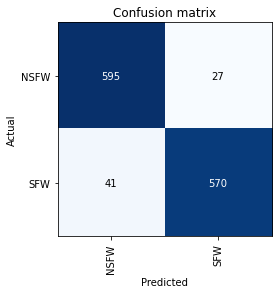

In [ ]:
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix()

In [ ]:
# Only for the brave! 
interp.plot_top_losses(9, nrows=3)